<a href="https://colab.research.google.com/github/nyunu/glucose_prediction/blob/main/%5B03_18~03_24%5D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B2%B0%ED%95%A9_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 정리

## 질문 리스트
**[ Q1 ]** 1인량(g)이 의미하는 바가 1회제공량이 맞는지 ?
- 찾아봤을 때, 1회제공량은 한 번의 섭취에 권장되는 양이고 & 1인량은 한 사람이 한번에 섭취하기에 적당한 양
- 1인량이라는건 1인분과 비슷한 의미이고, 좀 더 일반적으로 사용되는 용어라는 설명을 봤는데 맞는지
<br>

**[ Q1 ]** 대웅제약 데이터의 기준, 출처 (특히, 1인량(g) 기준)
- 어떤 제품군을 기준으로 영양 정보 데이터를 구성했는지 >> 출처 (예를 들어, 다이어트 식품군이라던가 ...)
- 어떤 기준으로 음식을 선택해서 구축한건지
<br>

**[ Q2 ]** 스타치 계산 방식
<br>

**[ Q3 ]** 데이터가 필요한 명확한 목적
- 사용자가 먹은 음식에 대해 입력했을 때, 이를 기반으로 혈당을 예측하여 예측된 혈당의 정확성을 높이기 위함
- 궁금한점
  - 식약처 음식 데이터는 시중에 판매되는 음식 + 통상적인 음식 으로 이루어져있음
  - fatsecret같은 어플처럼 실제 판매되는 음식을 입력해 칼로리 계산 + 이외의 음식?
  - 그동안 분석하며 어떤 음식이 혈당이 유독 튀더라 혹은 어떤 음식은 혈당을 낮추는 데 도움이 된다 하는 분석이 진행된 적이 있나요 ?
  - 음식의 분류에서 특히 어떤 음식들이 !! 이런거
<br>

**[ Q4 ]** 대웅제약 내부 데이터 구축 과정에서, 사용한 음식의 분류가 따로 있는지

## 요약
1. 식약처 & 대웅제약 내 모두 포함된 음식들을 확인해보았을 때, 1인 기준량이 매우 상이함
2. 대웅제약의 데이터의 형식을 유지하고 식약처 데이터를 병합하기 위해서는 스타치 변수의 추가 & 음식을 구성하는 재료들에 대한 데이터 수집이 필요함
2. 스타치 계산 방식을 사용해 계산하면 대웅제약 데이터와 값이 맞지 않는 것들이 생김 (>> 식약처 데이터에는 스타치 값이 없기 때문에 추가적인 변수 생성이 필요함)
3. 식약처 데이터 내에는 대웅제약과 같은 형태로 일반적인 음식과 그에 따른 영양성분을 포함한 것도 있고, 추가적으로 시중에서 판매되고 있는 제품들의 정보 또한 존재함.
4. 시중에서 판매되고 있는 제품들의 경우 데이터가 중복되었고 샘플로 몇 개만 확인해본 결과, 홈페이지 상의 실제 값과도 차이가 있음
  - 물론 중복되는 값들에 대해서만 제외하고 분석에 사용할 수도 있으나, 다른 데이터들의 신뢰성도 떨어지는 상황

5. 개인적인 소견이지만, 대웅제약의 데이터 내에 포함된 음식들은 요즘 사람들이 다이어트 레시피 !하면서 많이들 해먹는 그런 레시피인 것 같이 느껴졌고 & 식약처의 데이터는 일반화된 음식들이 포함된 데이터인 것 같다고 느꼈음
6. 식약처 데이터에서 시중에 실제 판매되는 음식들과 & 일반 음식에 대한 카테고리가 매우 상이함
7. 식약처 데이터를 통해서는 조리방식을 파악 *가능함*

## 적용점
1. 식약처 데이터에 '스타치'변수 추가
2. 대웅 데이터 내에 total 변수는 음식에 포함된 재료들의 모든 영양 성분을 합한 결과이기 때문에 앞선 재료들의 영양 정보를 모두 내포하고 있음. 따라서, 식약처 데이터와 대웅의 데이터를 조합할 때 모든 재료의 영양 정보를 추가하는 방법을 택하기 보단, 식약처 데이터 내에서 얻을 수 있는 조리 방식을 대웅의 데이터에 추가하고 이를 통해 혈당을 예측해보는 방안도 제안해보고 싶다. 이부분이 좀더 현실적으로 가능한 방법일 듯 싶기도 하고 ! 실제로 혈당은 조리방식에 따라서 차이가 많이 나기 때문에 (아래 그래프 참고)


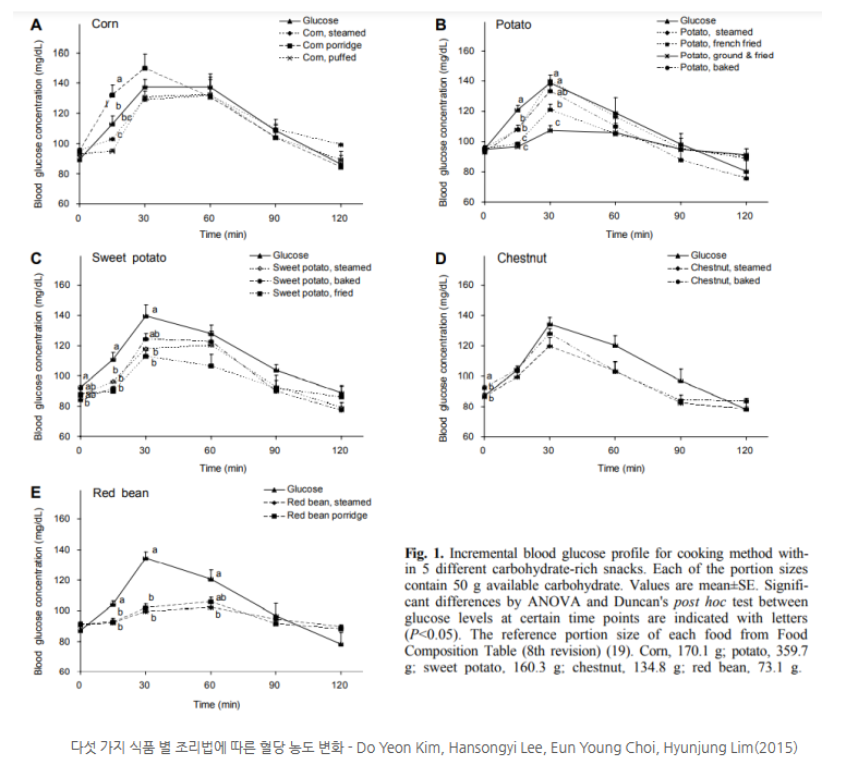

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_syc = pd.read_excel('/content/drive/MyDrive/대웅제약_혈당예측/data/통합 식품영양성분DB_음식.xlsx', skiprows = 1, header = 2).drop('NO', axis = 1)

In [ ]:
df_dw = pd.read_excel('/content/drive/MyDrive/대웅제약_혈당예측/data/대웅_영양소df.xlsx')

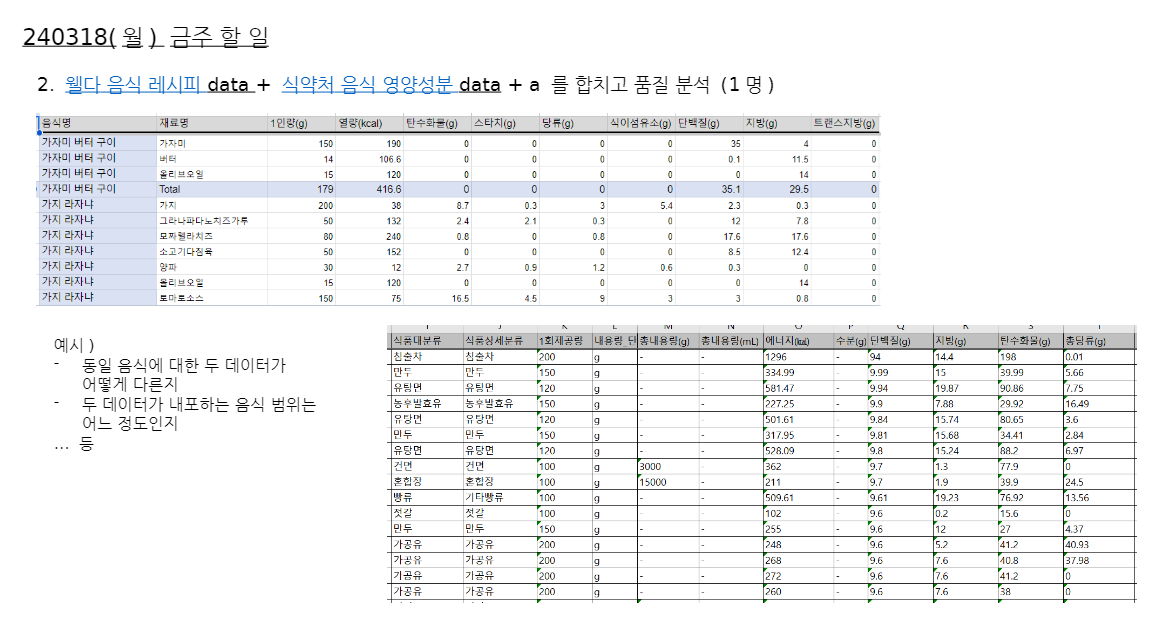

# 데이터 설명
- 가장 큰 차이점은 **식약처 데이터는 음식 단위, 대웅 데이터는 재료 단위로 제공**된다는 점.
- 물론 대웅 데이터 내에는 음식의 단위로도 포함되어 있음.

## 대웅 : 영양성분 데이터
- 포함 영양성분 : **탄수화물, 스타치(전분), 당류, 식이섬유소, 단백질, 지방, 트랜스지방**
- 음식명 + 재료명 + 1인량(1회제공량)
- **total = 이전 재료들 함량의 총합**

In [ ]:
df_dw.head()

,9wo,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g)
0,NaN,가자미 버터 구이,가자미,150.0,190.000000,0.0,0.0,0.0,0.0,35.000000,4.00,0.0
1,NaN,가자미 버터 구이,버터,14.0,106.586663,0.0,0.0,0.0,0.0,0.093333,11.48,0.0
2,NaN,가자미 버터 구이,올리브오일,15.0,120.000000,0.0,0.0,0.0,0.0,0.000000,14.00,0.0
3,0.0,가자미 버터 구이,Total,179.0,416.586663,0.0,0.0,0.0,0.0,35.093333,29.48,0.0
4,NaN,가지 라자냐,가지,200.0,38.000000,8.7,0.3,3.0,5.4,2.300000,0.30,0.0


In [ ]:
df_dw.drop('9wo', axis = 1, inplace = True)

In [ ]:
df_dw.head()

,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g)
0,가자미 버터 구이,가자미,150.0,190.000000,0.0,0.0,0.0,0.0,35.000000,4.00,0.0
1,가자미 버터 구이,버터,14.0,106.586663,0.0,0.0,0.0,0.0,0.093333,11.48,0.0
2,가자미 버터 구이,올리브오일,15.0,120.000000,0.0,0.0,0.0,0.0,0.000000,14.00,0.0
3,가자미 버터 구이,Total,179.0,416.586663,0.0,0.0,0.0,0.0,35.093333,29.48,0.0
4,가지 라자냐,가지,200.0,38.000000,8.7,0.3,3.0,5.4,2.300000,0.30,0.0


### total = 이전 재료들 함량의 총합

In [ ]:
unique_lst = df_dw['음식명'].unique()
col_lst = ['1인량(g)', '열량(kcal)', '탄수화물(g)', '스타치(g)', '당류(g)', '식이섬유소(g)', '단백질(g)', '지방(g)', '트랜스지방(g)']
df_diff = pd.DataFrame(columns = col_lst, index = unique_lst)


for i in range(len(df_dw['음식명'].unique())):
  df_diff.iloc[i] = pd.concat([pd.DataFrame(df_dw[df_dw['음식명'] == unique_lst[i]][col_lst].iloc[:-1].sum(axis = 0)).T,
                               pd.DataFrame(df_dw[df_dw['음식명'] == unique_lst[i]][col_lst].iloc[-1]).T]).diff().reset_index(drop = True).iloc[1]

In [ ]:
df_diff = df_diff.abs()
df_diff = df_diff.round()

In [ ]:
same_len = len(df_diff[(df_diff['1인량(g)'] == 0) & (df_diff['열량(kcal)'] == 0) & (df_diff['탄수화물(g)'] == 0) & (df_diff['스타치(g)'] == 0) & (df_diff['당류(g)'] == 0) & (df_diff['식이섬유소(g)'] == 0) & (df_diff['단백질(g)'] == 0) &
                        (df_diff['지방(g)'] == 0) & (df_diff['트랜스지방(g)'] == 0)])
diff_len = len(df_diff) - same_len
print('total - (재료 영양성분합) == 0:', same_len)
print('total - (재료 영양성분합) != 0:', diff_len)

total - (재료 영양성분합) == 0: 121
total - (재료 영양성분합) != 0: 20


In [ ]:
df_diff[(df_diff['1인량(g)'] != 0) | (df_diff['열량(kcal)'] != 0) |  (df_diff['탄수화물(g)'] != 0) |  (df_diff['스타치(g)'] != 0) |  (df_diff['당류(g)'] != 0) |  (df_diff['식이섬유소(g)'] != 0) |  (df_diff['단백질(g)'] != 0) |
                        (df_diff['지방(g)'] != 0)|  (df_diff['트랜스지방(g)'] != 0)]

,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g)
곤약 묵 무침,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
돼지고기 곤약잡채,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
돼지고기 부추 잡채,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
두부면 라자냐,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
뚝배기 불고기,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
마파두부,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
밀푀유나베,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
식초 모히또,850.0,469.25,10.75,0.75,3.2,6.8,19.25,38.7,1.0
식초 진저에일 칵테일,700.0,335.5,10.5,0.5,3.2,6.8,15.5,26.2,1.0
아이스식초레몬에이드,65.0,64.95,2.65,2.5,0.0,0.15,13.35,0.15,0.0


## 식약처 : 영양성분 데이터
- 대웅 데이터와 비교했을 때 비포함 영양성분 : **스타치(전분)**
- 전분에 대한 계산이 필요
  - 탄수화물 = 전분 + 당류 + 식이섬유
  - 전분 = 탄수화물 - 당류 - 식이섬유
- 해당 데이터 프레임에서는 **전분 = 총탄수화물 - 총당류 - 총식이섬유**   

참고링크 ) <br>

  - http://www.resam.co.kr/bbs/board.php?bo_table=webzine_2&wr_id=19
  - https://www.livestrong.com/article/522357-how-to-calculate-starches-in-nutrition-labels/

In [ ]:
df_syc.head(2)

,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,채취시기,식품대분류,식품상세분류,...,도코사펜타에노산(22:5(n-3))(g),도코사헥사에노산(22:6(n-3))(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 리놀레산 (18:2t)(g),트랜스 리놀렌산(18:3t)(g),회분(g),카페인(㎎),성분표출처,발행기관
0,D000006-94-AVG,D000006,음식,품목대표,꿩불고기,2019,충주,평균,구이류,육류구이,...,0,0.0234269823295255,0.1,0.018116327971628,0.0534160839712029,0,5.8,-,식약처('16) 제4권,식품의약품안전처
1,D000007-ZZ-AVG,D000007,음식,품목대표,닭갈비,2019,전국(대표),평균,구이류,육류구이,...,0.0157059786402594,0.00978204396329809,0.2,0.0750485023295658,0.0646068457814869,0.0132108495883938,7,-,식약처('16) 제4권,식품의약품안전처


In [ ]:
df_syc[df_syc['식품명'].str.contains('갈치')][df_syc.columns[:15]]

,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,채취시기,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉)
6797,D018017-ZZ-AVG,D018017,음식,품목대표,갈치구이,2020,전국(대표),평균,구이류,어패류구이,200.0,g,-,-,275.69
7201,D018421-ZZ-AVG,D018421,음식,품목대표,양념갈치젓,2020,전국(대표),평균,젓갈류,젓갈류,90.0,g,-,-,134.00
7206,D018426-ZZ-AVG,D018426,음식,품목대표,갈치조림,2020,전국(대표),평균,조림류,어패류조림,100.0,g,-,-,100.82
7208,D018428-ZZ-AVG,D018428,음식,품목대표,건갈치조림,2020,전국(대표),평균,조림류,어패류조림,100.0,g,-,-,127.65
7246,D018466-ZZ-AVG,D018466,음식,품목대표,갈치찌개,2020,전국(대표),평균,찌개 및 전골류,어패류찌개.전골,250.0,g,-,-,94.75
7607,D018827-ZZ-AVG,D018827,음식,외식,갈치조림,2020,쿡솜씨,평균,조림류,어패류조림,100.0,g,685,-,100


# 데이터 전처리

## 전분 변수 생성
**전분 = 총탄수화물 - 총당류 - 총식이섬유**

### 전분 공식 검증
: 대웅 데이터를 통해 위의 전분 공식을 가지고 전분량을 구했을 때, 맞게 나오는지를 확인 <br>

을 하려고 했는데 .. 계산 성립이 안됨 >> **대웅의 스타치 계산 방식은?**

In [ ]:
df_dw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   음식명       923 non-null    object 
 1   재료명       915 non-null    object 
 2   1인량(g)    915 non-null    float64
 3   열량(kcal)  697 non-null    float64
 4   탄수화물(g)   697 non-null    float64
 5   스타치(g)    697 non-null    float64
 6   당류(g)     697 non-null    float64
 7   식이섬유소(g)  696 non-null    float64
 8   단백질(g)    697 non-null    float64
 9   지방(g)     697 non-null    float64
 10  트랜스지방(g)  697 non-null    float64
dtypes: float64(9), object(2)
memory usage: 79.4+ KB


In [ ]:
df_dw['스타치_계산'] = df_dw['탄수화물(g)'] - df_dw['당류(g)'] - df_dw['식이섬유소(g)']

In [ ]:
df_dw[df_dw['스타치(g)'] != df_dw['스타치_계산']]

,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
4,가지 라자냐,가지,200.0,38.00,8.70,0.30,3.0,5.4,2.30,0.30,0.0,0.30
8,가지 라자냐,양파,30.0,12.00,2.70,0.90,1.2,0.6,0.30,0.00,0.0,0.90
11,가지 라자냐,Total,575.0,769.00,31.10,7.80,14.3,9.0,43.70,52.85,0.0,7.80
12,가지 베이컨 말이,가지,200.0,38.00,8.70,0.30,3.0,5.4,2.30,0.30,0.0,0.30
16,가지 베이컨 말이,Total,450.0,346.75,14.95,2.05,6.5,6.4,18.05,24.05,0.0,2.05
...,...,...,...,...,...,...,...,...,...,...,...,...
916,머그 크림치즈케이크,달걀,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
918,하드코어 주스,셀러리,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,하드코어 주스,오이,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
920,하드코어 주스,레몬,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


총 116개의 row에서 맞지 않게 계산됨 >> 약 12%의 데이터가 일치하지 않음

In [ ]:
close_values = np.isclose(df_dw['스타치(g)'], df_dw['스타치_계산'])
close_values = df_dw[~close_values].dropna()

In [ ]:
close_values

,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
18,갈릭 버터 새우,대하,500.000000,410.000000,0.500000,0.000000,0.000000,0.000000,90.500000,3.000000,0.0,0.500000
21,갈릭 버터 새우,Total,545.000000,647.500000,1.100000,0.600000,0.000000,0.000000,90.600000,29.300000,0.0,1.100000
22,감바스,마늘,10.000000,10.300000,1.700000,1.600000,0.100000,0.100000,0.900000,0.000000,0.0,1.500000
25,감바스,Total,140.000000,349.300000,1.900000,1.800000,0.100000,0.100000,24.900000,28.300000,0.0,1.700000
38,곤약 낙지 볶음,고추장,15.000000,30.800000,3.300000,2.500000,0.800000,0.600000,0.200000,0.000000,0.0,1.900000
...,...,...,...,...,...,...,...,...,...,...,...,...
630,해물 곤약 라면,Total,485.000000,344.000000,6.260000,4.060000,1.500000,0.800000,33.300000,17.290000,0.0,3.960000
652,해초 쫄면,고추장,30.000000,61.600000,6.600000,5.000000,1.600000,1.200000,0.400000,0.000000,0.0,3.800000
653,해초 쫄면,고춧가루,7.000000,19.693333,3.500000,0.560000,0.513333,2.473333,0.933333,1.000000,0.0,0.513333
655,해초 쫄면,식초,15.000000,1.800000,0.000000,0.300000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


## 동일한 컬럼만 남김

In [ ]:
df_syc_same = df_syc[['식품명', '1회제공량', '에너지(㎉)', '탄수화물(g)', '총당류(g)', '총 식이섬유(g)', '단백질(g)', '지방(g)', '트랜스 지방산(g)']]

In [ ]:
df_dw.columns

Index(['음식명', '재료명', '1인량(g)', '열량(kcal)', '탄수화물(g)', '스타치(g)', '당류(g)',
       '식이섬유소(g)', '단백질(g)', '지방(g)', '트랜스지방(g)', '스타치_계산'],
      dtype='object')

In [ ]:
df_syc_same.head()

,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)
0,꿩불고기,500.0,368.8,39.7,16.9,9.8,33.5,8.5,0.1
1,닭갈비,400.0,595.61,44.9,21.2,11.6,45.9,25.8,0.2
2,닭갈비,300.0,558.47,23.1,8.5,6.6,45.5,31.6,0.3
3,닭꼬치,70.0,176.722661137077,13.3476609876966,3.15210668563089,2.07170833333333,11.561723041353,8.56501389120873,0.0438631942105014
4,더덕구이,100.0,184,31.1,11.6,6.8,3.1,5.2,0


# EDA

## 식약처 데이터 내 식품명 중복값 확인
- **같은 식품명 & 같은 연도 출시 & 같은 지역/제조사** 인지 확인

In [ ]:
df_syc['식품명'] = df_syc['식품명'].str.replace(' ', '')
df_syc['지역 / 제조사'] = df_syc['지역 / 제조사'].str.replace(' ', '')

In [ ]:
uni = list(df_syc[df_syc.duplicated(['식품명', '지역 / 제조사', '연도'], keep = False)]['식품명'].unique())
print(len(uni))
print(uni[:5])

60
['허니코코망고 에이드', '퀸즈 캐롯', '비 마이 민트', '비 마이 스트로베리', '블랙 벨벳']


### 샘플 확인
- 세 가지 샘플 모두 같은 제조사, 같은 년도임에도 **다른 영양구조**를 가짐. 그리고 실제 조사한 결과와도 다른 결과를 보임

1) 피자마루 : 고구마 피자

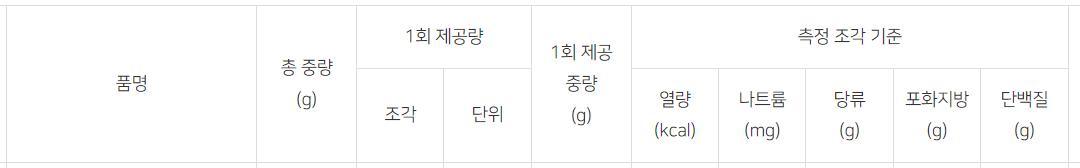
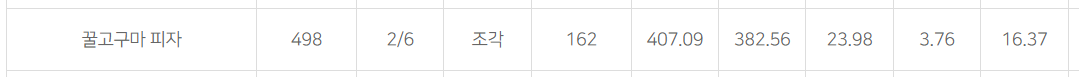

In [ ]:
df_syc[df_syc['식품명'] == '고구마 피자(R)'][df_syc.columns[:20]]

,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,채취시기,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),수분(g),단백질(g),지방(g),탄수화물(g),총당류(g)
5351,D015801-ZZ-AVG,D015801,음식,외식,고구마 피자(R),2019,피자마루,평균,빵류,피자류,155.0,g,155,-,399.82,-,16.71,-,-,8.32
5369,D015819-ZZ-AVG,D015819,음식,외식,고구마 피자(R),2019,피자마루,평균,빵류,피자류,205.0,g,205,-,534.96,-,23.36,-,-,11.51


2) 메가커피 허니자몽블랙티

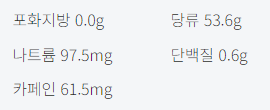
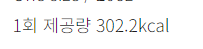

In [ ]:
df_syc[df_syc['식품명'] == '허니자몽블랙티'][df_syc.columns[:20]]

,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,채취시기,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),수분(g),단백질(g),지방(g),탄수화물(g),총당류(g)
6597,D017227-ZZ-AVG,D017227,음식,외식,허니자몽블랙티,2019,메가커피,평균,음료 및 차류,차류,680.0,g,680,-,233.13,-,0.48,-,-,56.82
6600,D017230-ZZ-AVG,D017230,음식,외식,허니자몽블랙티,2019,메가커피,평균,음료 및 차류,차류,680.0,g,680,-,234.93,-,0.51,-,-,57.27


3) 서브웨이 이탈리안 비엠티

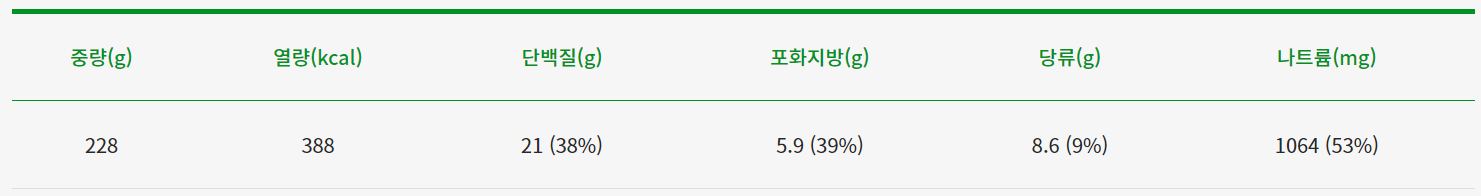

In [ ]:
df_syc[df_syc['식품명'] == '이탈리안 비엠티'][df_syc.columns[:20]]

,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,채취시기,식품대분류,식품상세분류,1회제공량,내용량_단위,총내용량(g),총내용량(mL),에너지(㎉),수분(g),단백질(g),지방(g),탄수화물(g),총당류(g)
5520,D015976-ZZ-AVG,D015976,음식,외식,이탈리안 비엠티,2019,서브웨이,평균,빵류,샌드위치류,226.0,g,226,-,410,-,6,-,-,20
5539,D015996-ZZ-AVG,D015996,음식,외식,이탈리안 비엠티,2019,서브웨이,평균,빵류,샌드위치류,351.0,g,351,-,230,-,6,-,-,14


### 전체 데이터에 대해 확인
- 1회제공량의 **차이유무** 파악 결과, 모두 다른 값을 가짐
- 어떤 값을 선택할 것인지에 대한 기준이 필요함

In [ ]:
df_diff = pd.DataFrame(columns = ['식품명', '1회제공량 차이유무'], index = list(range(len(uni))))

for i in range(len(uni)):
  df_diff.loc[i, '식품명'] = uni[i]

  if df_syc[df_syc['식품명'] == i]['1회제공량'].diff != 0:
    df_diff.loc[i, '1회제공량 차이유무'] = 1
  else:
    df_diff.loc[i, '1회제공량 차이유무'] = 0

In [ ]:
df_diff['1회제공량 차이유무'].value_counts()

1    60
Name: 1회제공량 차이유무, dtype: int64

물론 이 데이터들만 빼고 사용해도 되지만, 다른 데이터들이 정확하다고 확신하기 어려움

## 대웅 <-> 식약처 음식명 중복값 확인


### 음식명 내에 있는 띄어쓰기를 삭제해 형식 일치

In [ ]:
set(df_dw['음식명']) & set(df_syc['식품명'])

{'고추전', '깻잎전', '마파두부', '밀푀유나베', '약과'}

In [ ]:
intersect_lst = set(df_dw['음식명'].str.replace(' ', '')) & set(df_syc['식품명'].str.replace(' ', ''))
print(intersect_lst)

{'밀푀유나베', '고추전', '깻잎전', '뚝배기불고기', '머핀', '카프레제샐러드', '마파두부', '약과'}


In [ ]:
df_dw['음식명'] = df_dw['음식명'].str.replace(' ', '')
df_syc['식품명'] = df_syc['식품명'].str.replace(' ', '')

### 같은 음식에 대한 표기 확인
- 1인량 & 1회제공량 간에 차이 매우 큼
- 다루는 제품군이 다른 것 같음. 그래서 이외 열량, 당류 등의 모든 영양성분의 값이 매우 상이하게 나타남


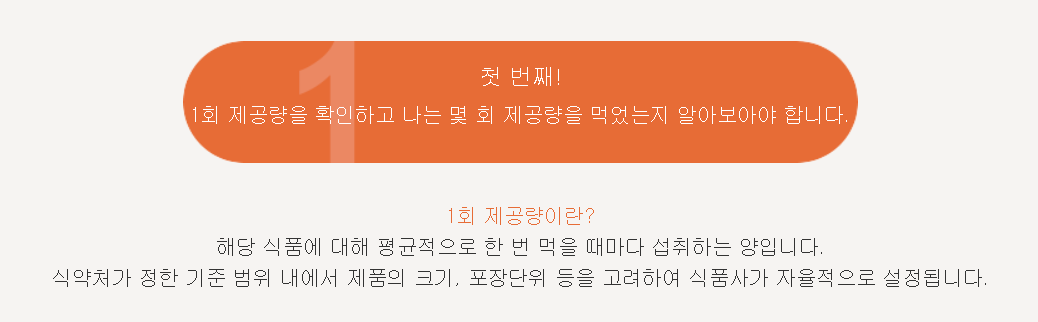

In [ ]:
for i in intersect_lst:
  print('*****', i, '*****')
  print('(1) 대웅제약')
  display(df_dw[(df_dw['음식명'] == i) & (df_dw['재료명'] == 'Total')])
  print('(2) 식약처')
  display(df_syc_same[df_syc_same['식품명'] == i])
  print()

***** 밀푀유나베 *****
(1) 대웅제약


,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
287,밀푀유나베,Total,395.0,475.65,12.19,3.2,2.9,6.16,23.29,25.31,0.0,3.13


(2) 식약처


,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)



***** 고추전 *****
(1) 대웅제약


,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
36,고추전,Total,242.999998,417.266664,11.116667,6.333333,2.483333,2.3,25.933333,29.466667,0.0,6.333333


(2) 식약처


,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)
190,고추전,150.0,274.689469925775,17.0098472091341,2.16960393306138,7.4742555754879,12.910375,17.2231756765821,0.0933814381105523



***** 깻잎전 *****
(1) 대웅제약


,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
135,깻잎전,Total,222.999998,409.266664,9.116667,6.333333,0.883333,1.9,26.133333,29.466667,0.0,6.333333


(2) 식약처


,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)
192,깻잎전,150.0,361.098939373814,14.5429778192423,1.06054046821257,4.59935076032906,17.7359416666667,25.7759179366865,0.145218173648547



***** 뚝배기불고기 *****
(1) 대웅제약


,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
245,뚝배기불고기,Total,373.0,362.18,9.06,3.46,3.1,2.2,27.0,25.266667,0.0,3.76


(2) 식약처


,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)



***** 머핀 *****
(1) 대웅제약


,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
270,머핀,Total,359.999994,1074.404755,16.797619,2.714286,7.083333,7.0,36.749999,94.333333,0.0,2.714286


(2) 식약처


,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)
7084,머핀,130.0,499.29,76.89,51.55,1.44,7.45,17.99,0.20



***** 카프레제샐러드 *****
(1) 대웅제약


,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
495,카프레제샐러드,Total,253.0,438.53,6.059,0.0,5.198,0.861,22.615,36.123,0.0,-2.220446e-16


(2) 식약처


,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)



***** 마파두부 *****
(1) 대웅제약


,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
265,마파두부,Total,327.0,455.183331,28.849999,7.1,4.533333,5.883333,24.283333,28.3,0.0,18.433333


(2) 식약처


,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)
7040,마파두부,160.0,174.33,8.58,3.92,3.50,11.67,10.37,0.04



***** 약과 *****
(1) 대웅제약


,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
384,약과,Total,258.999998,1281.666665,19.25,4.0,4.75,10.5,36.083333,120.666667,0.0,4.0


(2) 식약처


,식품명,1회제공량,에너지(㎉),탄수화물(g),총당류(g),총 식이섬유(g),단백질(g),지방(g),트랜스 지방산(g)
289,약과,30.0,119.731083609929,25.4666687853226,5.06590327350936,1.60169284224004,1.25874493365554,1.42549208155741,0.0128985887770436


In [ ]:
df_syc[df_syc['식품명'] == '약과']

,SAMPLE_ID,식품코드,DB군,상용제품,식품명,연도,지역 / 제조사,채취시기,식품대분류,식품상세분류,...,도코사펜타에노산(22:5(n-3))(g),도코사헥사에노산(22:6(n-3))(g),트랜스 지방산(g),트랜스 올레산(18:1(n-9)t)(g),트랜스 리놀레산 (18:2t)(g),트랜스 리놀렌산(18:3t)(g),회분(g),카페인(㎎),성분표출처,발행기관
289,D000486-ZZ-AVG,D000486,음식,품목대표,약과,2019,전국(대표),평균,과자류,한과류,...,0,0,0.0128985887770436,0,0,0,0.093077865134876,-,(주)대산후드,식품의약품안전처


In [ ]:
df_syc['성분표출처'].unique()

array(["식약처('16) 제4권", "식약처('12) 제1권", "식약처('17) 제5권", "식약처('15) 제3권",
       "식약처('13) 제2권", "식약처('12) 제1권/명절", '(주)대산후드', "식약처('13) 제2권/명절",
       "식약처('19)", "식약처 영양실태조사('20)", "식약처('20)", "식약처('21)"],
      dtype=object)

## 식품 범위 확인

### 식약처

- 상용제품 = **'품목대표'** : **일반적인 음식**에 대한 영양정보 >> 현재 대웅제약의 데이터는 이것과 유사함

In [ ]:
product_1 = df_syc[df_syc['상용제품'] == '품목대표']['식품명'].unique()
print(len(product_1))
print(product_1[:10])

825
['꿩불고기' '닭갈비' '닭꼬치' '더덕구이' '도미구이' '돼지갈비' '병어구이' '불고기' '붕장어소금구이' '소양념갈비구이']


- 상용제품 = **'외식'** : 실제 **시중에서 판매되고 있는 제품**에 대한 영양정보

In [ ]:
product_2 = df_syc[df_syc['상용제품'] == '외식']['식품명'].unique()
print(len(product_2))
print(product_2[:10])

6190
['글램핑바비큐(오리지널L)' '글램핑바비큐(나폴리M)' '글램핑바비큐(나폴리L)' '글램핑바비큐(씬M)' '글램핑바비큐(씬L)'
 '글램핑바비큐(슈퍼시드함유도우M)' '글램핑바비큐(슈퍼시드함유도우L)' '글램핑바비큐더블치즈엣지(오리지널M)'
 '글램핑바비큐더블치즈엣지(오리지널L)' '더블크러스트이베리코(더블크러스트L)']


- 중복이 존재했던 데이터는 모두 외식 카테고리 내에 포함되어 있음

In [ ]:
len(set(uni) & set(product_2))

66

- 식품 대분류 & 상세분류

In [ ]:
df_syc['식품대분류'].unique()

array(['구이류', '국 및 탕류', '볶음류', '기타', '튀김류', '회류', '찌개 및 전골류', '찜류',
       '생채및 무침류', '김치류', '숙채류', '곡류 및 서류', '면 및 만두류', '밥류', '빵류',
       '음료 및 차류', '장아찌 및 절임류', '전.적 및 부침류', '조림류', '죽 및 스프류', '포류', '과자류',
       '아이스크림류', '젓갈류'], dtype=object)

In [ ]:
df_syc['식품상세분류'].unique()

array(['육류구이', '채소류구이', '어패류구이', '어패류국.탕', '채소류국.탕', '기타 국류', '육류국.탕',
       '기타 볶음류', '육류볶음', '기타', '육류튀김', '회류', '육류찌개.전골', '어패류찜', '어패류무침',
       '김치', '나물.숙채류', '떡류', '곡류 및 서류', '중식면류', '라면류', '국수류', '스파게티류',
       '나물.채소류무침', '기타 생채.무침류', '김밥(초밥)류', '기타 밥류', '덮밥류', '비빔밥류', '볶음밥류',
       '쌀밥.잡곡밥류', '채소류볶음', '어패류볶음', '기타 빵류', '앙금빵류', '크림빵류', '피자류',
       '샌드위치류', '도넛류', '케이크류', '페이스트리류', '기타 음료류', '장아찌.절임류', '적류',
       '어패류전', '채소류전', '부침류', '육류전', '어패류조림', '채소류조림', '육류조림', '죽류',
       '어패류찌개.전골', '채소류찌개.전골', '육류찜', '채소류튀김', '어패류튀김', '치킨류', '포류',
       '한과류', '샐러드', '리조또.그라탕류', '기타 튀김류', '떡볶이류', '아이스크림류', '커피류', '차류',
       '과일.채소음료류', '탄산음료류', '스무디류', '식빵류', '빙수류', '기타 과자류', '우유.유제품류',
       '주류', '쿠키.비스킷류', '스프류', '초콜릿류', '스낵류', '버거류', '만두류', '채소류찜', '냉국류',
       '기타 면류', '기타 전.적', '젓갈류', '기타 조림류', '기타 찜류', '기타 구이류', '탕류'],
      dtype=object)

- 상용제품 = **'품목대표'** & **식품 대분류**
  - 상용제품과 외식 간의 대분류 차이가 꽤 크게 존재함
  - 아무래도 외식의 경우 과자, 빵 등에 있어서의 비중이 큼

In [ ]:
df1 = pd.DataFrame(df_syc[df_syc['상용제품'] == '품목대표']['식품대분류'].value_counts())
df1.columns = ['품목대표_식품대분류']
df2 = pd.DataFrame(df_syc[df_syc['상용제품'] == '외식']['식품대분류'].value_counts())
df2.columns = ['외식_식품대분류']

In [ ]:
df3 = pd.merge(df1, df2, left_index = True, right_index = True, how = 'outer').fillna(0)
df3

,품목대표_식품대분류,외식_식품대분류
곡류 및 서류,26,3.0
과자류,5,210.0
구이류,56,19.0
국 및 탕류,102,19.0
기타,3,82.0
김치류,19,7.0
면 및 만두류,55,72.0
밥류,92,18.0
볶음류,71,61.0
빵류,47,3120.0


In [ ]:
df3['외식_식품대분류'] = df3['외식_식품대분류'].rank(method = 'min', ascending = False)
df3['품목대표_식품대분류'] = df3['품목대표_식품대분류'].rank(method = 'min', ascending = False)

In [ ]:
df3 = df3.astype('int')

In [ ]:
df3

,품목대표_식품대분류,외식_식품대분류
곡류 및 서류,13,20
과자류,19,5
구이류,5,11
국 및 탕류,1,11
기타,20,6
김치류,15,16
면 및 만두류,6,8
밥류,2,13
볶음류,4,9
빵류,8,1


### 대웅
- 다이어트 식품 위주로 구성된 것으로 보임
- 특히 두부면, ABC주스 등 다이어트에 좋은 음식들이 많이 보이고 시중의 다이어트 레시피와 유사한 메뉴들이 보임


In [ ]:
df_dw['음식명'].unique()

array(['가자미버터구이', '가지라자냐', '가지베이컨말이', '갈릭버터새우', '감바스', '고소한아몬드나쵸', '고추전',
       '곤약낙지볶음', '곤약달걀떡볶이', '곤약달걀장조림', '곤약묵무침', '곤약물회', '곤약야끼소바',
       '곤약쟁반짜장', '곤약콩국수', '곤약면팟타이', '과카몰리', '구운애호박부라타샐러드',
       '구운야채를곁들인버터닭구이', '그릭요거트바크', '깨강정', '깻잎전', '달걀소보로비빔밥',
       '닭가슴살아스파라거스볶음', '닭꼬치소금구이', '닭윙봉구이', '대패삼겹살숙주찜', '돼지고기곤약잡채',
       '돼지고기부추잡채', '두반장가지볶음', '두부멘보샤', '두부면들기름국수', '두부면라자냐', '두부면봉골레파스타',
       '두부유부초밥', '두유면짜파구리', '또띠아치킨랩', '뚝배기불고기', '라따뚜이', '마파두부', '머핀',
       '목살된장구이', '밀푀유나베', '바지락애호박칼국수', '베트남곤약쌀국수', '병아리콩전', '부라타치즈샐러드',
       '브리치즈구이', '새우홍합찜', '새콤한곤약비빔면', '소고기가지전', '순두부치즈그라탕', '시금치알리오올리오',
       '시금치프리타타', '식초모히또', '식초진저에일칵테일', '아스파라거스베이컨말이', '아이스식초레몬에이드',
       '애호박면해물파스타', '약과', '달걀', '양배추참치계란덮밥', '에그인헬', '연어스테이크', '오색꼬치전',
       '오야꼬동', '오이참치비빔밥', '오징어먹물곤약쌀리소또', '오징어버터구이', '오징어면오일파스타',
       '우삼겹숙주볶음', '육전', '쥬키니호박바질샐러드', '차돌두부면마라볶음', '차전자피부시맨빵', '차지키소스',
       '참치엔다이브보트', '치즈과자', '카프레제샐러드', '콜리플라워김치볶음밥', '콜리플라워라이스사케동',
       '콜리플라워버섯크림리조또', '콜리플라워크림리조또', '크

달걀 > 데이터 오류

In [ ]:
df_dw.iloc[380:390]

,음식명,재료명,1인량(g),열량(kcal),탄수화물(g),스타치(g),당류(g),식이섬유소(g),단백질(g),지방(g),트랜스지방(g),스타치_계산
380,약과,베이킹파우더,14.000000,5.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000
381,약과,아몬드가루,150.000000,862.500000,18.000000,3.000000,4.500000,10.5,31.500000,75.000000,0.0,3.000000
382,약과,올리브오일,30.000000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,28.000000,0.0,0.000000
383,약과,참기름,15.000000,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,14.000000,0.0,0.000000
384,약과,Total,258.999998,1281.666665,19.250000,4.000000,4.750000,10.5,36.083333,120.666667,0.0,4.000000
385,달걀,굴소스,5.000000,2.566667,0.533333,0.533333,0.000000,0.0,0.066667,0.000000,0.0,0.533333
386,양배추참치계란덮밥,달걀,49.999998,54.166665,0.250000,0.000000,0.250000,0.0,4.583333,3.666667,0.0,0.000000
387,양배추참치계란덮밥,양배추,100.000000,24.000000,5.000000,0.000000,2.800000,2.2,2.000000,0.200000,0.0,0.000000
388,양배추참치계란덮밥,올리브오일,15.000000,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,14.000000,0.0,0.000000
389,양배추참치계란덮밥,간장,5.000000,3.333333,0.666667,0.333333,0.333333,0.0,0.333333,0.000000,0.0,0.333333
